Question 1: Handling of Missing Values and Outliers (20 points)
You are given a medical measurement data set (larger medical dataset 500 homework1.csv) with several
missing values and potential outliers from a real-world hospital. You need to conduct some basic analysis
with this dataset:
• Load the dataset from a CSV file.
• Impute missing values using an advanced imputation technique, such as K-Nearest Neighbors Impu-
tation (KNNImputer).
• Identify outliers in the blood pressure column using the Z-score method.
• Remove rows that contain outliers from the dataset.
• Scale the data using StandardScaler and explain why scaling is important.
Hint:
• Use scikit-learn’s KNNImputer for missing data imputation.
• Use the Z-score to detect outliers: Z = X−μ
σ , μ is the mean and σ is the standard deviation.
• Scale the data using StandardScaler from scikit-learn

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [23]:
file_path = "/Users/agnesslungu/Downloads/larger_medical_dataset_500_hw1_q1.csv"
data = pd.read_csv(file_path)

print(data.head())


   patient_id  age  blood_pressure  cholesterol  weight
0           1   24           102.8        174.7    67.3
1           2   41           137.8        183.1    70.7
2           3   37             NaN        231.1    76.2
3           4   45            82.7        252.4    63.7
4           5   51           117.7        202.3    69.7


Text(0, 0.5, 'Values')

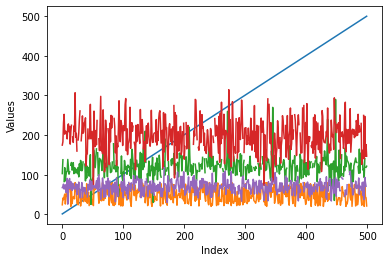

In [14]:
plt.plot(data)
plt.xlabel('Index')
plt.ylabel('Values')




In [24]:
#checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

patient_id         0
age                0
blood_pressure    50
cholesterol       40
weight            30
dtype: int64


In [25]:
#using KNN_imputer 
knn_imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

#check for missing values again
missing_values = data.isnull().sum()
print(missing_values)

patient_id        0
age               0
blood_pressure    0
cholesterol       0
weight            0
dtype: int64


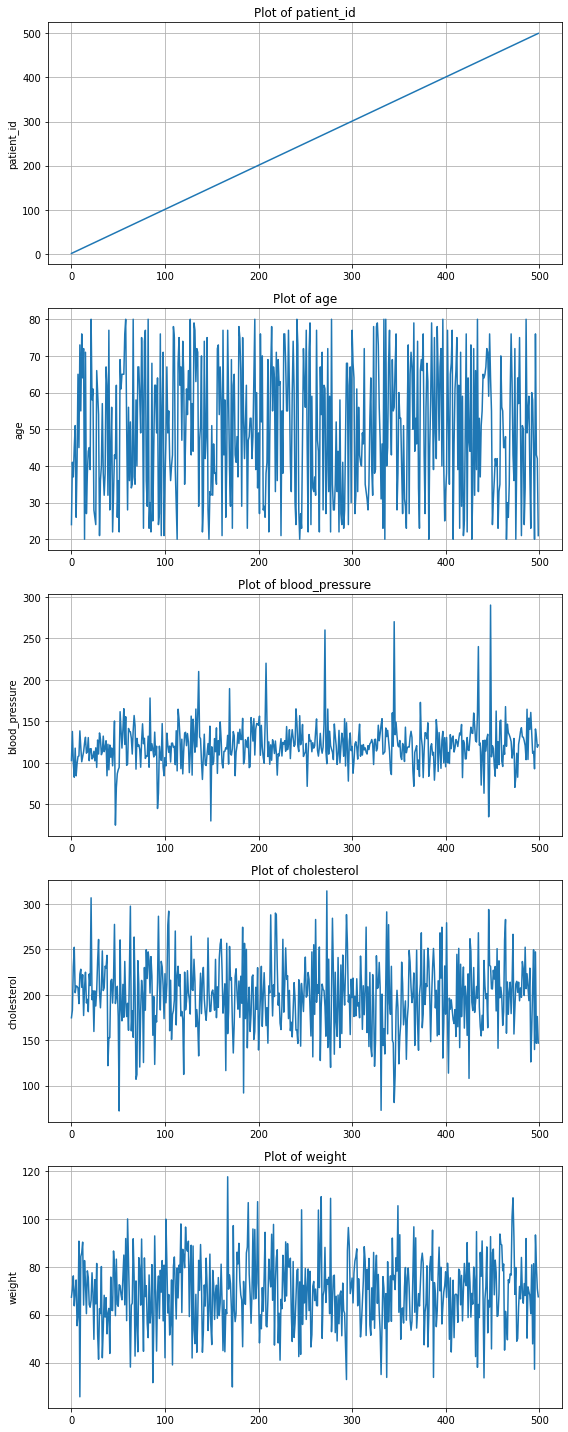

In [28]:
n_cols = data.shape[1]  # Number of columns in the dataset
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(8, n_cols * 4))
# Loop through each column and plot the data
for i, column in enumerate(data.columns):
    axes[i].plot(data.index, data[column])
    axes[i].set_title(f'Plot of {column}')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Adjust layout so the plots don't overlap
plt.tight_layout()
plt.show()

In [35]:
# Function to remove or replace outliers using Z-Score
def handle_outliers_z_score(df, threshold=3):
    # Calculate the Z-Scores
    z_scores = (df - df.mean()) / df.std()
    
    # Identify outliers
    outliers = (np.abs(z_scores) > threshold)
    
    # Replace outliers with NaN (or you can drop them)
    df_cleaned = df.mask(outliers, np.nan)
    return df_cleaned, outliers

# Apply the function to your dataset
data_cleaned, outliers = handle_outliers_z_score(data)


#now we will just drop all the columns with na
# Drop all columns with NaN values
data_cleaned = data.dropna(axis=1)

data.head()

,patient_id,age,blood_pressure,cholesterol,weight
0,1.0,24.0,102.80,174.7,67.3
1,2.0,41.0,137.80,183.1,70.7
2,3.0,37.0,99.98,231.1,76.2
3,4.0,45.0,82.70,252.4,63.7
4,5.0,51.0,117.70,202.3,69.7


In [38]:
# Initializing the StandardScaler
scaler = StandardScaler()

# Standardize the data
data_standardized = scaler.fit_transform(data_cleaned)

# Convert the standardized data back to a DataFrame
data = pd.DataFrame(data_standardized, columns=data_cleaned.columns)

# Display the standardized dataset
print("Standardized Data:")
print(data.head())

Standardized Data:
   patient_id       age  blood_pressure  cholesterol    weight
0   -1.728590 -1.435461       -0.720439    -0.624226 -0.151005
1   -1.721662 -0.491809        0.652244    -0.410792  0.075809
2   -1.714734 -0.713845       -0.831038     0.808832  0.442714
3   -1.707806 -0.269773       -1.508751     1.350040 -0.391160
4   -1.700877  0.063280       -0.136068     0.077058  0.009099


Part 2. 
You are working with a dataset that contains information about houses, including their prices and various
features like the number of rooms, lot size, year built, and proximity to amenities. Your task:
• Load the dataset. Perform a Pearson correlation analysis and identify the top 3 features most correlated
with price.
• Implement Recursive Feature Elimination (RFE) using a linear regression model to select the top 5
features for predicting house prices.
• Why the features selected by RFE might differ from those identified using correlation?
page 1 of 3


In [43]:
file_path = "/Users/agnesslungu/Downloads/housing_data_hw1_q2.csv"
df = pd.read_csv(file_path)
#df.head()
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Identify the correlation of all features with the target variable 'price'
price_corr = correlation_matrix['price']

# Sort the correlations in descending order and get the top 3 features
top_features = price_corr.abs().sort_values(ascending=False).head(4)  # Top 3 features + 'price' itself
top_features


price                  1.000000
lot_size               0.064708
num_bathrooms          0.037659
neighborhood_rating    0.036590
Name: price, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define the feature set and target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Initialize a linear regression model
model = LinearRegression()

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
selected_features


Index(['proximity_to_amenities', 'num_bathrooms', 'garage_size', 'has_pool',
       'crime_rate'],
      dtype='object')

the features are dufferebt pearson correlation measures the linear relationship between two variables. It does not capture non-linear relationships or interactions between features. As a result, features that correlate highly with the target might not necessarily contribute to predictive power when considered together.

In [46]:
import pandas as pd

# Load the dataset
file_path = '/Users/agnesslungu/Downloads/medical_data_hw1_q3.csv'
df = pd.read_csv(file_path)


df.head()


,age,BMI,cholesterol,blood_pressure,smoking_habits,physical_activity,medical_condition
0,42,36.9,158,116,0,8.3,0
1,47,24.2,189,125,1,7.2,0
2,73,29.6,95,109,0,4.1,1
3,51,22.2,117,96,1,9.6,0
4,52,26.1,145,138,0,5.6,0


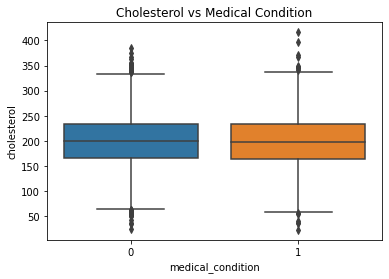

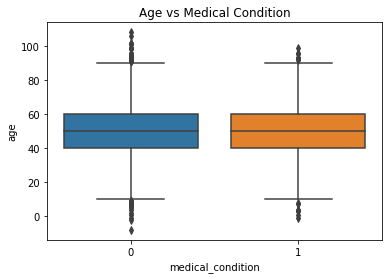

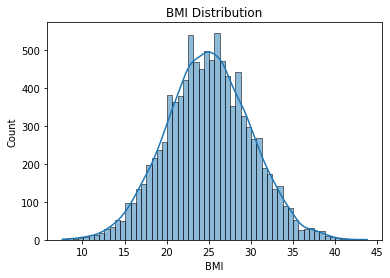

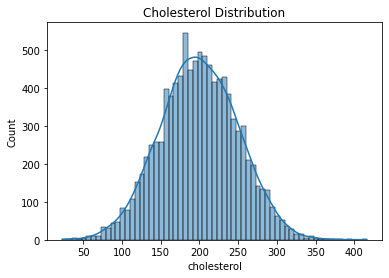

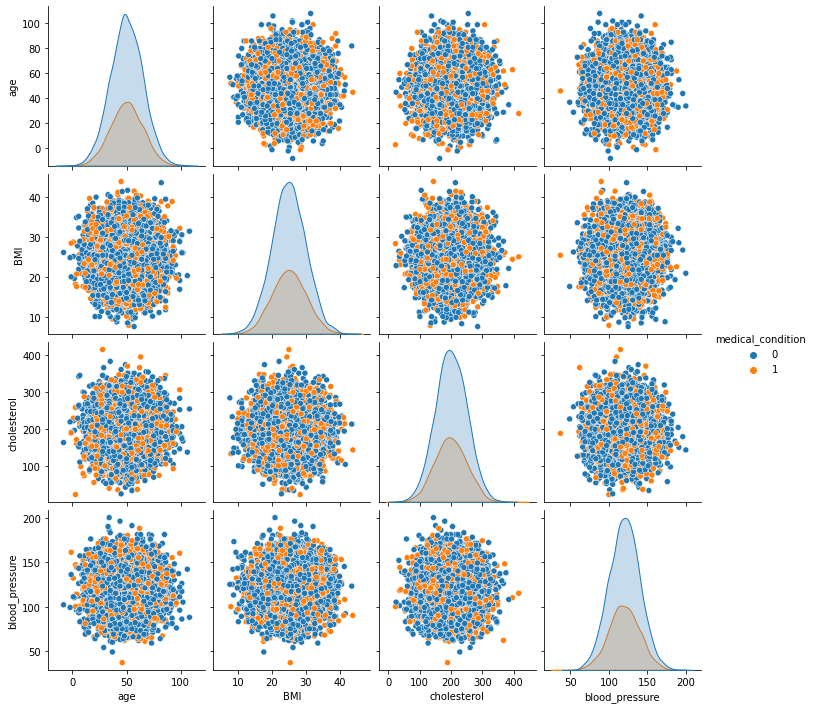

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt




sns.boxplot(x='medical_condition', y='cholesterol', data=df)
plt.title("Cholesterol vs Medical Condition")
plt.show()


sns.boxplot(x='medical_condition', y='age', data=df)
plt.title("Age vs Medical Condition")
plt.show()


sns.histplot(df['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

sns.histplot(df['cholesterol'], kde=True)
plt.title("Cholesterol Distribution")
plt.show()


sns.pairplot(df[['age', 'BMI', 'cholesterol', 'blood_pressure', 'medical_condition']], hue='medical_condition')
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = df.drop(columns=['medical_condition'])  # Features
y = df['medical_condition']  # Target

model = LogisticRegression(max_iter=1000)


rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe


Index(['BMI', 'cholesterol', 'blood_pressure', 'smoking_habits',
       'physical_activity'],
      dtype='object')

In [50]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)

mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Info', ascending=False)

top_features_entropy = mutual_info_df.head(5)['Feature']
top_features_entropy


1                  BMI
5    physical_activity
4       smoking_habits
0                  age
2          cholesterol
Name: Feature, dtype: object